<a href="https://colab.research.google.com/github/VivekJeldi/Bharat_SentimentAnalysis/blob/main/Bharat_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [45]:
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [35]:
! pip install langdetect
from langdetect import detect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=34e5c3f7599eaed5ef297d969c8a8088a51303837c3e32a0f5a1c02d6f5c30ca
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from tqdm.notebook import tqdm

In [157]:
url = "https://raw.githubusercontent.com/VivekJeldi/Bharat_SentimentAnalysis/main/BharatvsIndia.csv"
#data = requests.get(url).content
df = pd.read_csv(url)

In [158]:
df.head()

Category         Keyword                                       Web_Page_URL  \
0  TopPost  #BharatvsIndia  https://twitter.com/search?q=#BharatvsIndia&sr...   
1  TopPost  #BharatvsIndia  https://twitter.com/search?q=#BharatvsIndia&sr...   
2  TopPost  #BharatvsIndia  https://twitter.com/search?q=#BharatvsIndia&sr...   
3  TopPost  #BharatvsIndia  https://twitter.com/search?q=#BharatvsIndia&sr...   
4  TopPost  #BharatvsIndia  https://twitter.com/search?q=#BharatvsIndia&sr...   

                                       Tweet_Website      Author_Name  \
0  https://twitter.com/tastytrade/status/16977043...       tastytrade   
1  https://twitter.com/adeline_rg/status/17003752...    AdelineReload   
2  https://twitter.com/Aaslihuman/status/16990779...          Dr.Baba   
3  https://twitter.com/BBQ_Guys/status/1371888737...      BBQGuys.com   
4  https://twitter.com/AkarapuSaiteja1/status/169...  Akarapu Saiteja   

                   Author_Web_Page_URL Tweet_Timestamp  \
0       https://twitter.com/tastytrade             NaN   
1       https://twitter.com/adeline_rg      2023-09-09   
2       https://twitter.com/Aaslihuman      2023-09-05   
3         https://twitter.com/BBQ_Guys             NaN   
4  https://twitter.com/AkarapuSaiteja1      2023-09-05   

                                       Tweet_Content  \
0                 Markets crash. Your app shouldn’t.   
1  "இந்தியா" பெயரை மாற்ற இவன்க யாரு கோமாளி...!?!#...   
2  Government Changes India's name to Bharat. 1. ...   
3  Maximize your backyard year round with an outd...   
4  Since BJP has changed name from India to old B...   

                                     Tweet_Image_URL  \
0  https://pbs.twimg.com/media/F4TdH0fasAAU5LO?fo...   
1                                                NaN   
2  https://pbs.twimg.com/media/F5RWXPwaIAEMhPt?fo...   
3  https://pbs.twimg.com/ad_img/13718883759601131...   
4  https://pbs.twimg.com/media/F5TNVhPaQAElEdT?fo...   

                                     Tweet_Video_URL Tweet_AD  \
0  https://twitter.com/tastytrade/status/16977043...     True   
1  https://twitter.com/adeline_rg/status/17003752...    False   
2  https://twitter.com/Aaslihuman/status/16990779...    False   
3  https://twitter.com/BBQ_Guys/status/1371888737...     True   
4  https://twitter.com/AkarapuSaiteja1/status/169...    False   

  Tweet_Number_of_Reviews Tweet_Number_of_Retweets Tweet_Number_of_Likes  \
0                      19                        5                   248   
1                      39                      296                   747   
2                      39                       97                   801   
3                     212                       86                   399   
4                      30                       31                   173   

  Tweet_Number_of_Looks  
0                237.5K  
1                 9,354  
2                 88.7K  
3                   NaN  
4                 27.7K

In [159]:
df.shape

(1199, 15)

In [160]:
df = df[['Tweet_Timestamp', 'Tweet_Content']]

In [161]:
df.head()

Tweet_Timestamp                                      Tweet_Content
0             NaN                 Markets crash. Your app shouldn’t.
1      2023-09-09  "இந்தியா" பெயரை மாற்ற இவன்க யாரு கோமாளி...!?!#...
2      2023-09-05  Government Changes India's name to Bharat. 1. ...
3             NaN  Maximize your backyard year round with an outd...
4      2023-09-05  Since BJP has changed name from India to old B...

In [162]:
df.isnull().sum()

Tweet_Timestamp    185
Tweet_Content        0
dtype: int64

In [163]:
df = df.drop_duplicates()

In [164]:
df['Tweet_Timestamp'].value_counts()

2023-09-06         390
2023-09-07          38
2023-09-10          21
2023-09-09          18
2023-09-05          18
2023-09-08          16
Tweet_Timestamp      1
Name: Tweet_Timestamp, dtype: int64

In [165]:
df.isnull().sum()

Tweet_Timestamp    80
Tweet_Content       0
dtype: int64

In [166]:
df = df.dropna()

In [167]:
df.isnull().sum()

Tweet_Timestamp    0
Tweet_Content      0
dtype: int64

In [168]:
df.shape

(502, 2)

In [169]:
df['Tweet_Timestamp'].value_counts()

2023-09-06         390
2023-09-07          38
2023-09-10          21
2023-09-09          18
2023-09-05          18
2023-09-08          16
Tweet_Timestamp      1
Name: Tweet_Timestamp, dtype: int64

In [170]:
df = df[df['Tweet_Timestamp']!='Tweet_Timestamp']

In [171]:
def detect_language(text):
  try:
    lang = detect(text)
  except:
    lang = None

  return lang

In [172]:
df['Language'] = df['Tweet_Content'].apply(detect_language)

In [173]:
df.head()

Tweet_Timestamp                                      Tweet_Content Language
1      2023-09-09  "இந்தியா" பெயரை மாற்ற இவன்க யாரு கோமாளி...!?!#...       ta
2      2023-09-05  Government Changes India's name to Bharat. 1. ...       en
4      2023-09-05  Since BJP has changed name from India to old B...       en
5      2023-09-09  I would rather call my country 'Bharat,' herea...       en
7      2023-09-06  Oops !  Considering we’re the ONLY nation that...       en

In [174]:
df['Language'].value_counts()

en    433
id     36
hi     13
ta      5
kn      3
te      2
tl      2
sw      2
ja      1
it      1
gu      1
bn      1
Name: Language, dtype: int64

In [175]:
df = df[df['Language'] == 'en']

In [176]:
df.head()

Tweet_Timestamp                                      Tweet_Content Language
2      2023-09-05  Government Changes India's name to Bharat. 1. ...       en
4      2023-09-05  Since BJP has changed name from India to old B...       en
5      2023-09-09  I would rather call my country 'Bharat,' herea...       en
7      2023-09-06  Oops !  Considering we’re the ONLY nation that...       en
8      2023-09-09  #G20India2023 #BharatMandapam Real India  PR B...       en

In [177]:
english_stopwords = stopwords.words('english')
hinglish_stopwords = stopwords.words('hinglish')

In [178]:
def clean_tweet(tweet):
  tweet = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", tweet)
  tweet = re.sub(r"[^\w\s]", "", tweet)

  # Tokenize the tweet
  tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
  tokens = tokenizer.tokenize(tweet)

  # Remove stopwords for English and Hinglish
  tokens = [token for token in tokens if token not in english_stopwords and token not in hinglish_stopwords]

  # Remove punctuation and convert to lowercase
  tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
  tokens = [token.lower() for token in tokens]

  # Join tokens back into a string
  cleaned_tweet = ' '.join(tokens)

  return cleaned_tweet

In [179]:
df['cleaned_tweet'] = df['Tweet_Content'].apply(clean_tweet)

In [180]:
df.head()

Tweet_Timestamp                                      Tweet_Content Language  \
2      2023-09-05  Government Changes India's name to Bharat. 1. ...       en   
4      2023-09-05  Since BJP has changed name from India to old B...       en   
5      2023-09-09  I would rather call my country 'Bharat,' herea...       en   
7      2023-09-06  Oops !  Considering we’re the ONLY nation that...       en   
8      2023-09-09  #G20India2023 #BharatMandapam Real India  PR B...       en   

                                       cleaned_tweet  
2  government changes indias bharat 1 congress su...  
4  bjp changed india bharat documents invalidis 1...  
5                                call country bharat  
7                oops considering nation ocean named  
8  real india pr bharat bjp unnecessarily started...

In [181]:
sia = SIA()
df['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(df['cleaned_tweet'])]


  0%|          | 0/433 [00:00<?, ?it/s]

In [182]:
df.head()

Tweet_Timestamp                                      Tweet_Content Language  \
2      2023-09-05  Government Changes India's name to Bharat. 1. ...       en   
4      2023-09-05  Since BJP has changed name from India to old B...       en   
5      2023-09-09  I would rather call my country 'Bharat,' herea...       en   
7      2023-09-06  Oops !  Considering we’re the ONLY nation that...       en   
8      2023-09-09  #G20India2023 #BharatMandapam Real India  PR B...       en   

                                       cleaned_tweet  sentiment  
2  government changes indias bharat 1 congress su...     0.7003  
4  bjp changed india bharat documents invalidis 1...     0.0772  
5                                call country bharat     0.0000  
7                oops considering nation ocean named     0.0000  
8  real india pr bharat bjp unnecessarily started...    -0.5994

In [183]:
df.sort_values('sentiment', ascending=False)

Tweet_Timestamp                                      Tweet_Content  \
643      2023-09-06  When people with great hearts extend their lov...   
365      2023-09-06  Our constitution recognizes both names, but Bh...   
312      2023-09-06  Embrace your roots and heritage!  Let's celebr...   
260      2023-09-07  But who listens to a logical, considerate inte...   
447      2023-09-06  Our sports legends, from Dhyan Chand to P.T. U...   
..              ...                                                ...   
388      2023-09-06  #Watch  At least two dead and five missing and...   
686      2023-09-06  #PakistanDefeatDaySee this, Pakistan does this...   
239      2023-09-06  A lot of untaught #history is coming out in #S...   
105      2023-09-06  Video that unfolds the horrific demeanour whic...   
240      2023-09-06  #IndiaThatIsBharat#Modi ji is having trouble w...   

    Language                                      cleaned_tweet  sentiment  
643       en  great hearts extend love care handicapped anim...     0.9460  
365       en  constitution recognizes names bharat holds spe...     0.9313  
312       en  embrace roots heritage lets celebrate rich his...     0.9169  
260       en  listens logical considerate intellectual dr in...     0.9136  
447       en  sports legends dhyan chand pt usha brought glo...     0.8910  
..       ...                                                ...        ...  
388       en     dead missing significant damage infrastructure    -0.8360  
686       en  pakistan soldiers losing war shame pakistan सस...    -0.8625  
239       en  lot untaught coming arguments article 370 list...    -0.8885  
105       en  video unfolds horrific demeanour ruined innume...    -0.8979  
240       en  ji trouble renaming world laughing todaythere ...    -0.9231  

[433 rows x 5 columns]

In [184]:
df.sort_values('sentiment', ascending=True)

Tweet_Timestamp                                      Tweet_Content  \
240      2023-09-06  #IndiaThatIsBharat#Modi ji is having trouble w...   
105      2023-09-06  Video that unfolds the horrific demeanour whic...   
239      2023-09-06  A lot of untaught #history is coming out in #S...   
686      2023-09-06  #PakistanDefeatDaySee this, Pakistan does this...   
388      2023-09-06  #Watch  At least two dead and five missing and...   
..              ...                                                ...   
352      2023-09-06  Celebrating the birth of the divine, the misch...   
260      2023-09-07  But who listens to a logical, considerate inte...   
312      2023-09-06  Embrace your roots and heritage!  Let's celebr...   
365      2023-09-06  Our constitution recognizes both names, but Bh...   
643      2023-09-06  When people with great hearts extend their lov...   

    Language                                      cleaned_tweet  sentiment  
240       en  ji trouble renaming world laughing todaythere ...    -0.9231  
105       en  video unfolds horrific demeanour ruined innume...    -0.8979  
239       en  lot untaught coming arguments article 370 list...    -0.8885  
686       en  pakistan soldiers losing war shame pakistan सस...    -0.8625  
388       en     dead missing significant damage infrastructure    -0.8360  
..       ...                                                ...        ...  
352       en  celebrating birth divine mischievous beloved k...     0.8910  
260       en  listens logical considerate intellectual dr in...     0.9136  
312       en  embrace roots heritage lets celebrate rich his...     0.9169  
365       en  constitution recognizes names bharat holds spe...     0.9313  
643       en  great hearts extend love care handicapped anim...     0.9460  

[433 rows x 5 columns]

In [188]:
df[df['sentiment']>0.35].sort_values('sentiment')

Tweet_Timestamp                                      Tweet_Content  \
687      2023-09-06  India Is Now A Comedy Circus ......#BharatVsIn...   
409      2023-09-06  Constitution of India recognizes 'Bharat' as a...   
679      2023-09-06  Ek safar….ek jazba….ek kahani… Ek din.   All T...   
281      2023-09-06  Constitution recognizes "Bharat" as a union of...   
220      2023-09-07  "Bharat Isn't Banned"The word India was Introd...   
..              ...                                                ...   
447      2023-09-06  Our sports legends, from Dhyan Chand to P.T. U...   
260      2023-09-07  But who listens to a logical, considerate inte...   
312      2023-09-06  Embrace your roots and heritage!  Let's celebr...   
365      2023-09-06  Our constitution recognizes both names, but Bh...   
643      2023-09-06  When people with great hearts extend their lov...   

    Language                                      cleaned_tweet  sentiment  
687       en                                india comedy circus     0.3612  
409       en  constitution india recognizes bharat valid cou...     0.3612  
679       en  safarek jazbaek kahani din time blockbuster ch...     0.3612  
281       en  constitution recognizes bharat union states em...     0.3612  
220       en  bharat bannedthe word india introduced europea...     0.3612  
..       ...                                                ...        ...  
447       en  sports legends dhyan chand pt usha brought glo...     0.8910  
260       en  listens logical considerate intellectual dr in...     0.9136  
312       en  embrace roots heritage lets celebrate rich his...     0.9169  
365       en  constitution recognizes names bharat holds spe...     0.9313  
643       en  great hearts extend love care handicapped anim...     0.9460  

[144 rows x 5 columns]

In [187]:
df[df['sentiment']<-0.5].sort_values('sentiment', ascending=False).head()

Tweet_Timestamp                                      Tweet_Content  \
328      2023-09-07  Heard that  the INDIGO airlines is in panic fo...   
653      2023-09-07  Modi ji's befitting reply on insult to Sanatan...   
213      2023-09-06  If Bharata is based on King Bharat, how come i...   
589      2023-09-06  Why? I can count opposition seats on finger & ...   
108      2023-09-10  Human story of #BharatVsIndia Is it a 'Victory...   

    Language                                      cleaned_tweet  sentiment  
328       en  heard indigo airlines panic proposed renaming ...    -0.5106  
653       en         modi befitting reply insult sanatan dharma    -0.5106  
213       en  bharata based king bharat bharat mata bharat pita    -0.5267  
589       en  count opposition seats finger shamelessness in...    -0.5859  
108       en  human story victory local officials act land r...    -0.5859

In [189]:
def label_sentiment(s):

  if s>0.35:
    label = 'positive'
  elif s<-0.5:
    label = 'negative'
  else:
    label = 'neutral'

  return label

In [190]:
df['opinion'] = df['sentiment'].apply(label_sentiment)
df.head()

Tweet_Timestamp                                      Tweet_Content Language  \
2      2023-09-05  Government Changes India's name to Bharat. 1. ...       en   
4      2023-09-05  Since BJP has changed name from India to old B...       en   
5      2023-09-09  I would rather call my country 'Bharat,' herea...       en   
7      2023-09-06  Oops !  Considering we’re the ONLY nation that...       en   
8      2023-09-09  #G20India2023 #BharatMandapam Real India  PR B...       en   

                                       cleaned_tweet  sentiment   opinion  
2  government changes indias bharat 1 congress su...     0.7003  positive  
4  bjp changed india bharat documents invalidis 1...     0.0772   neutral  
5                                call country bharat     0.0000   neutral  
7                oops considering nation ocean named     0.0000   neutral  
8  real india pr bharat bjp unnecessarily started...    -0.5994  negative

In [191]:
df['opinion'].value_counts()

neutral     258
positive    144
negative     31
Name: opinion, dtype: int64

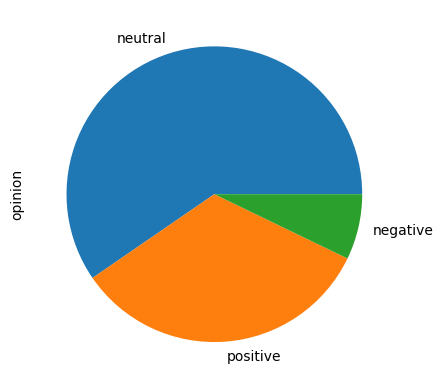

In [192]:
df['opinion'].value_counts().plot(kind='pie')
plt.show()

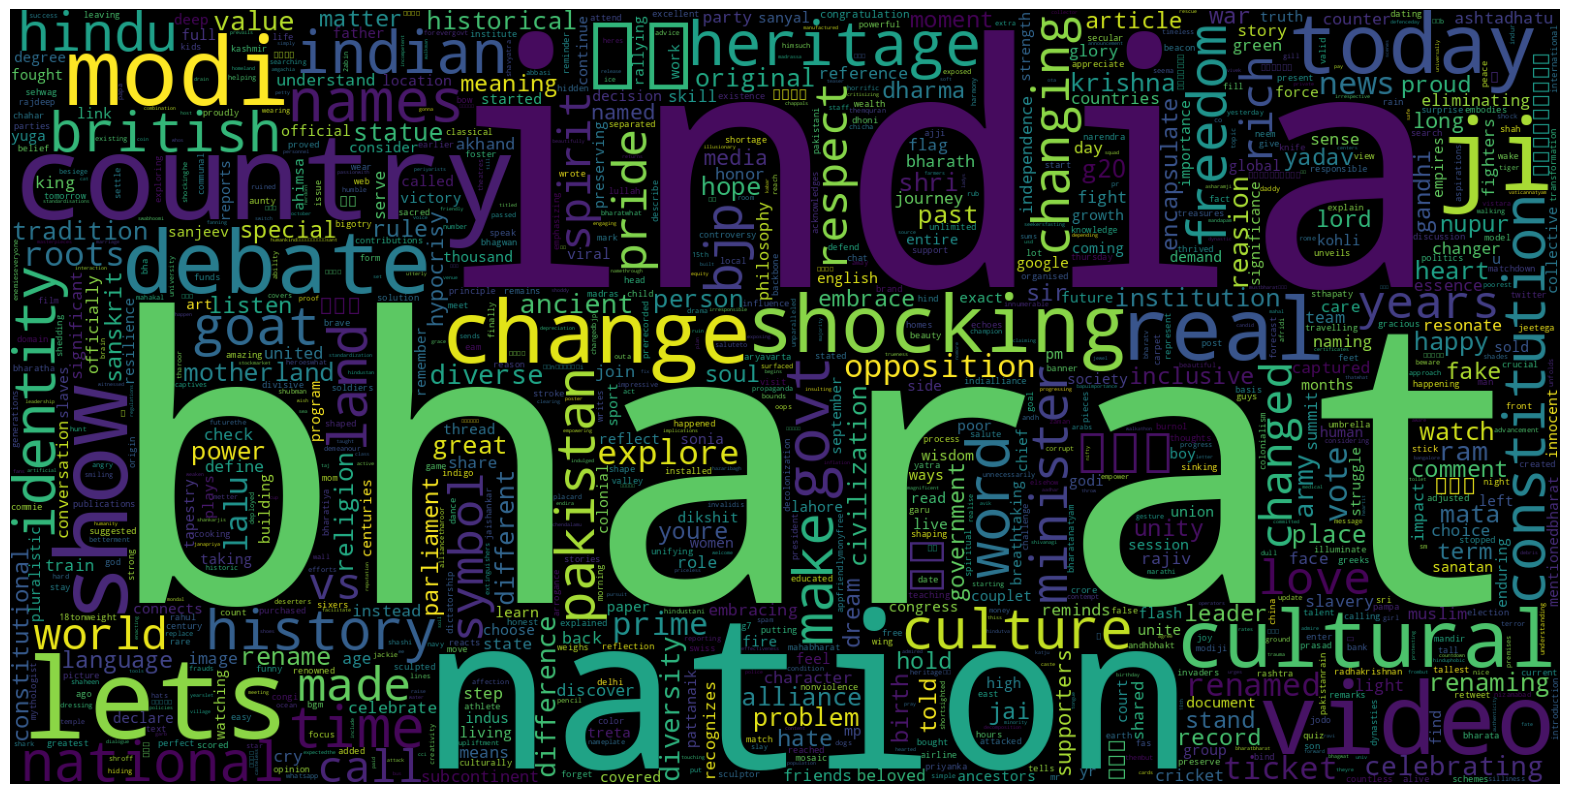

In [193]:
from wordcloud import WordCloud
data = df['cleaned_tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

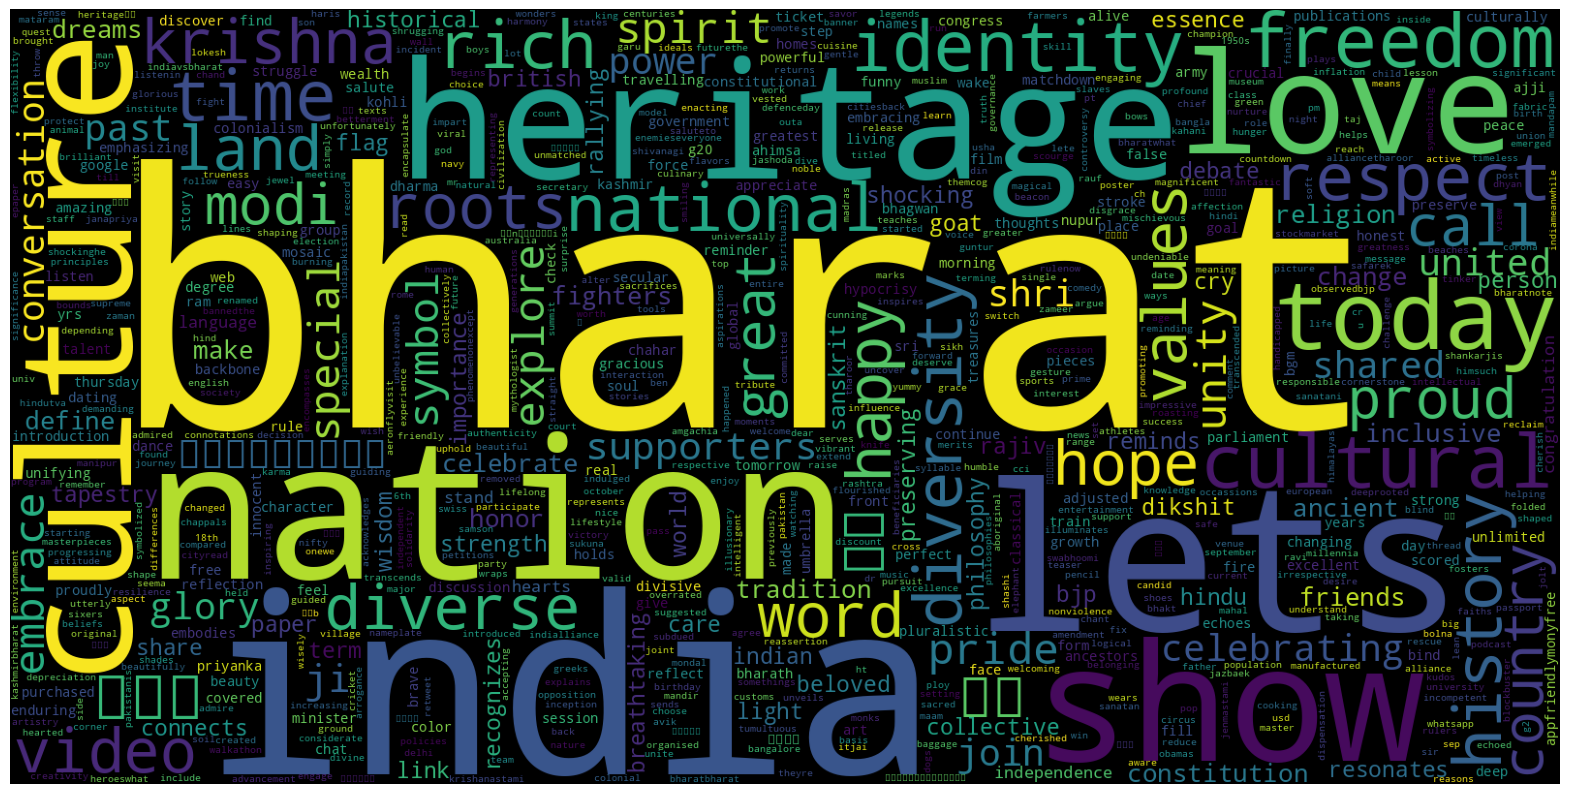

In [194]:
data = df.loc[df['opinion']=='positive', 'cleaned_tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

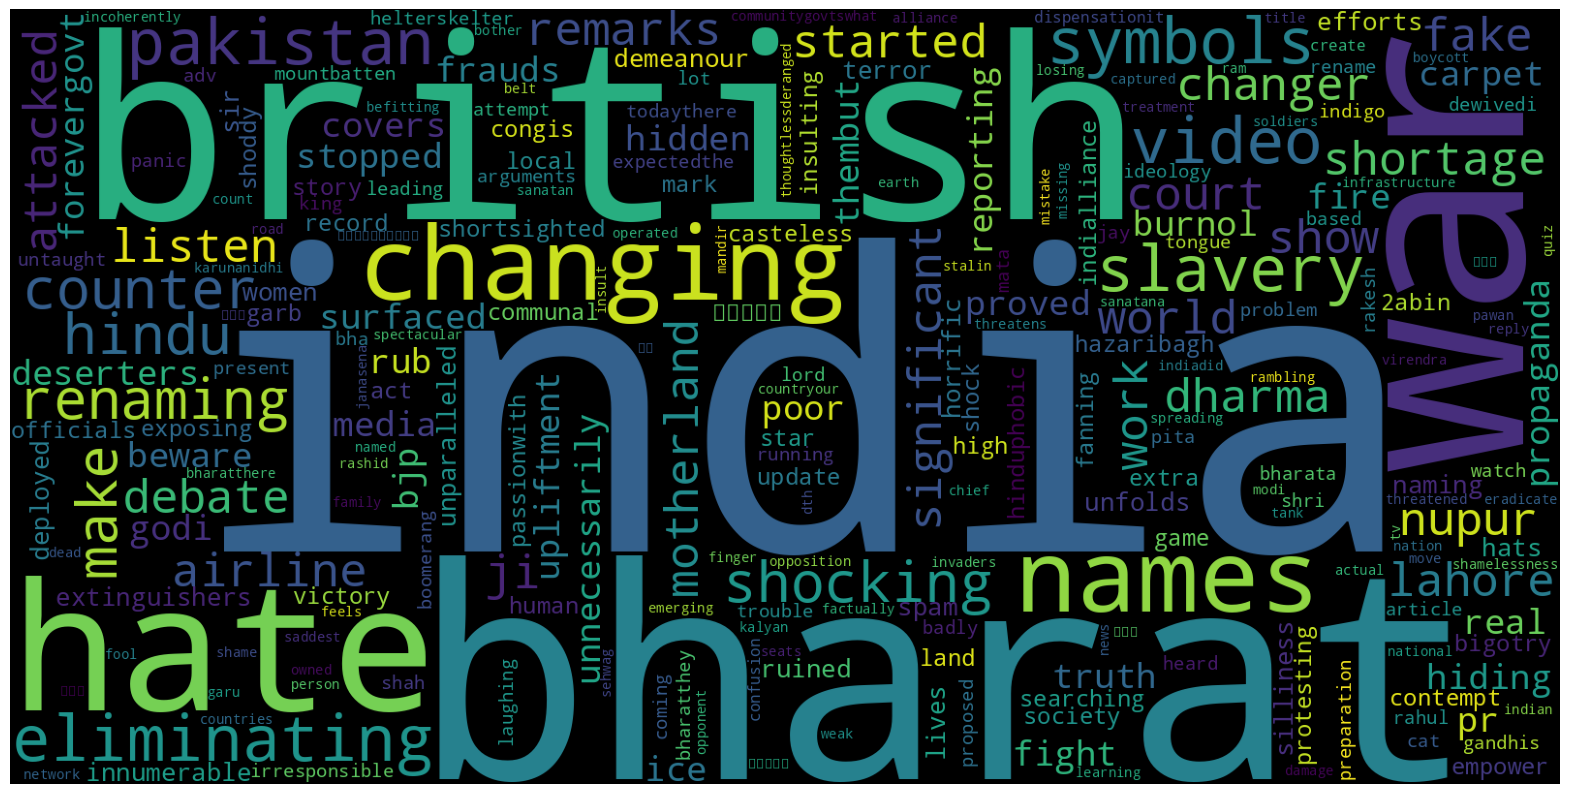

In [195]:
data = df.loc[df['opinion']=='negative', 'cleaned_tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

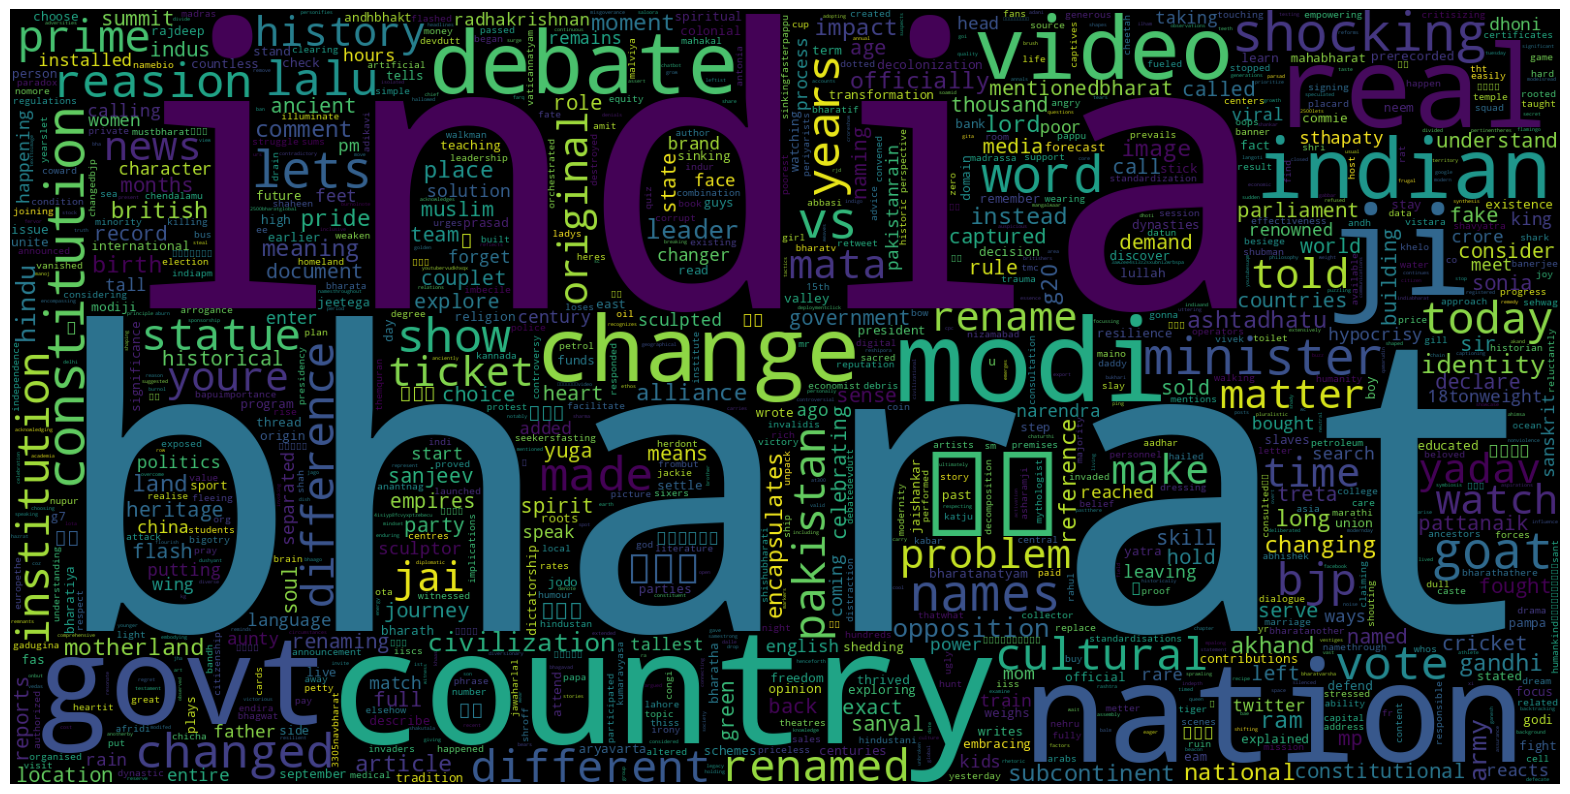

In [196]:
data = df.loc[df['opinion']=='neutral', 'cleaned_tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [197]:
df.groupby('Tweet_Timestamp')['opinion'].count()

Tweet_Timestamp
2023-09-05     16
2023-09-06    346
2023-09-07     30
2023-09-08     13
2023-09-09     12
2023-09-10     16
Name: opinion, dtype: int64

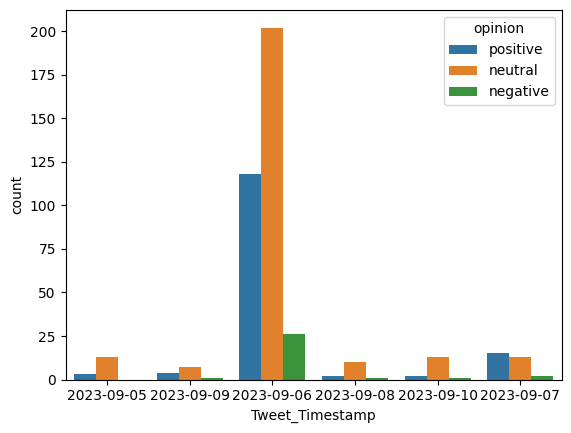

In [198]:
sns.countplot(x=df['Tweet_Timestamp'],  hue=df['opinion'])
plt.show()

In [ ]:
''